# Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

In [2]:
d = pd.read_csv('./Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
d.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [4]:
d.shape

(1050, 15)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
uniq_id                    1050 non-null object
crawl_timestamp            1050 non-null object
product_url                1050 non-null object
product_name               1050 non-null object
product_category_tree      1050 non-null object
pid                        1050 non-null object
retail_price               1049 non-null float64
discounted_price           1049 non-null float64
image                      1050 non-null object
is_FK_Advantage_product    1050 non-null bool
description                1050 non-null object
product_rating             1050 non-null object
overall_rating             1050 non-null object
brand                      712 non-null object
product_specifications     1049 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 115.9+ KB


### Missing values

In [4]:
# Global filling rate
fill_rate = d.count().mean()/d.shape[0]
fill_rate

0.9783492063492063

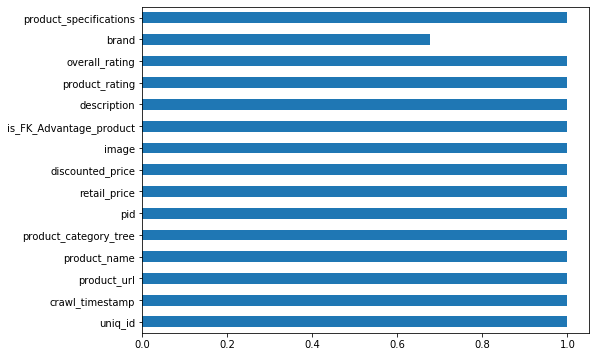

In [5]:
# Column filling rate
plt.figure(figsize=(8,6))
d.notnull().mean().plot.barh()
plt.show()

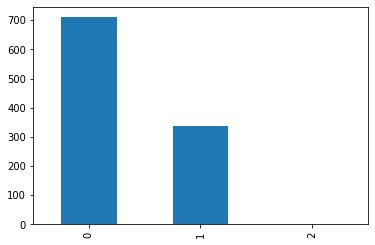

In [6]:
# Counting missing values per row
(d.shape[1] - d.count(axis=1)).value_counts().sort_index().plot.bar()

In [9]:
d.loc[0,'product_specifications']

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [10]:
d.loc[0,'description']

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [11]:
d.loc[0,'product_url']

'http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z'

### Product Name

In [12]:
d['product_name'].head(10)

0    Elegance Polyester Multicolor Abstract Eyelet ...
1                           Sathiyas Cotton Bath Towel
2                  Eurospa Cotton Terry Face Towel Set
3    SANTOSH ROYAL FASHION Cotton Printed King size...
4    Jaipur Print Cotton Floral King sized Double B...
5    Maserati Time R8851116001 Analog Watch  - For ...
6    Camerii WM64 Elegance Analog Watch  - For Men,...
7    T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys
8    Alfajr WY16B Youth Digital Watch  - For Men, Boys
9    TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...
Name: product_name, dtype: object

### Retail Price / Discounted Price

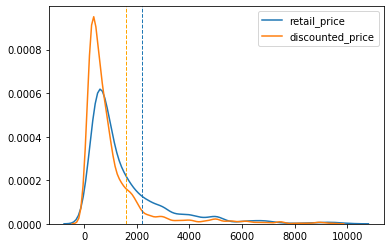

In [13]:
sns.kdeplot(d[d['retail_price'] < 10000]['retail_price'])
sns.kdeplot(d[d['discounted_price'] < 10000]['discounted_price'])
plt.axvline(d['retail_price'].mean(), ls='--', lw=1)
plt.axvline(d['discounted_price'].mean(), ls='--', lw=1, c='orange')
plt.show()

### FK Advantage Product

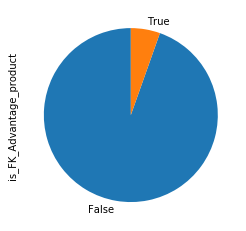

In [14]:
d['is_FK_Advantage_product'].value_counts().plot.pie(startangle=90)

### Brand

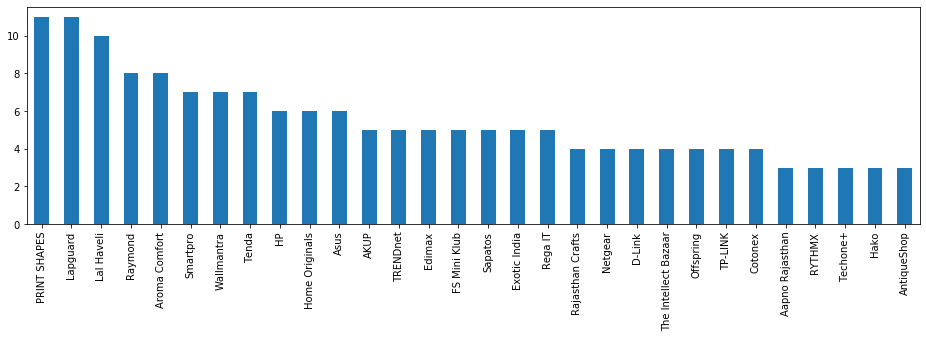

In [15]:
d['brand'].value_counts()[0:30].plot.bar(figsize=(16,4))

### Product rating / overall rating

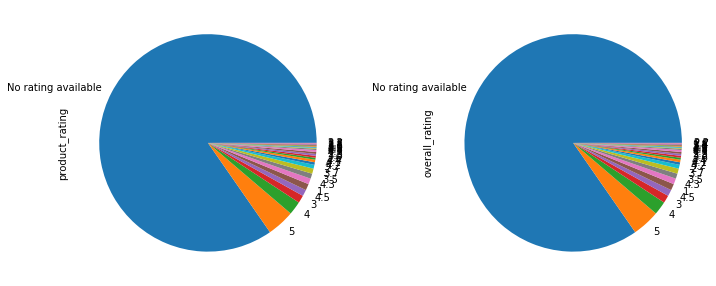

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
d['product_rating'].value_counts().plot.pie(ax=ax[0])
d['overall_rating'].value_counts().plot.pie(ax=ax[1])
plt.show()

### Crawl timestamp

In [17]:
# Première et dernière valeur
d['crawl_timestamp'].sort_values().iloc[[0,-1]]

316    2015-12-01 06:13:00 +0000
998    2016-06-26 14:21:24 +0000
Name: crawl_timestamp, dtype: object

### Description

In [18]:
d['description'].head(10)

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
5    Maserati Time R8851116001 Analog Watch  - For ...
6    Camerii WM64 Elegance Analog Watch  - For Men,...
7    T STAR UFT-TSW-005-BK-BR Analog Watch  - For B...
8    Alfajr WY16B Youth Digital Watch  - For Men, B...
9    TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...
Name: description, dtype: object

### Product Category Tree

In [19]:
d['product_category_tree'].head(10)

0    ["Home Furnishing >> Curtains & Accessories >>...
1    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
5    ["Watches >> Wrist Watches >> Maserati Time Wr...
6    ["Watches >> Wrist Watches >> Camerii Wrist Wa...
7    ["Watches >> Wrist Watches >> T STAR Wrist Wat...
8    ["Watches >> Wrist Watches >> Alfajr Wrist Wat...
9    ["Watches >> Wrist Watches >> TAG Heuer Wrist ...
Name: product_category_tree, dtype: object

In [20]:
d.loc[0,'product_category_tree'].split('>>')[1]

' Curtains & Accessories '

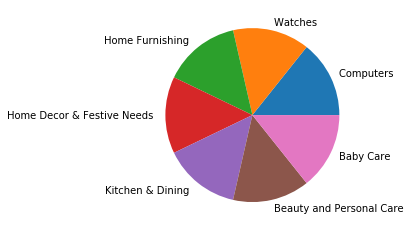

In [5]:
d['main_cat'] = d['product_category_tree'].apply(lambda x: x.split('>>')[0][2::])
d['main_cat'].value_counts().plot.pie()
plt.axis('off')
plt.show()

### Displaying 4 images for each category

In [8]:
def load_image(file_name):
    file_path = '/'.join(('./Flipkart/Images',file_name))
    return cv2.imread(file_path)
d['img']=d['image'].apply(load_image)

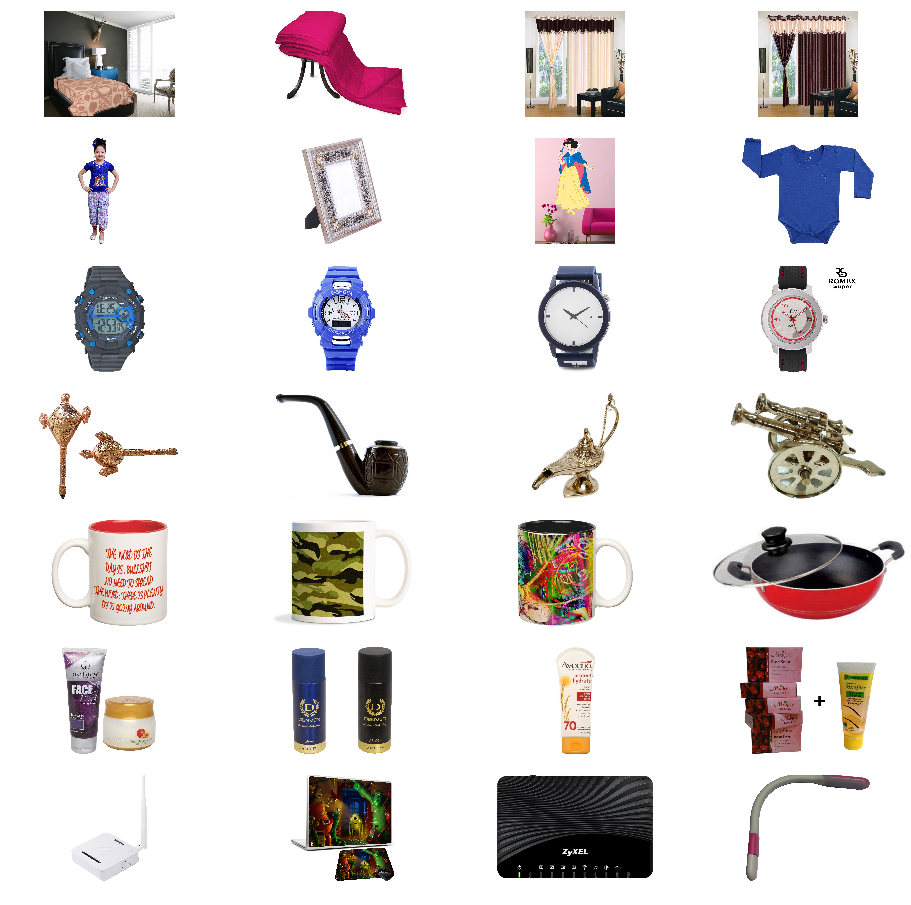

In [9]:
lcat = d['main_cat'].unique().tolist()
figure = plt.figure(figsize=(16,16))
i=1
for cat in lcat:
    sample=d[d.main_cat == cat].sample(4).index
    for index in sample:
        figure.add_subplot(7,4,i)
        im = d.loc[index,'img']
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        i += 1